<a href="https://colab.research.google.com/github/MichaelCBarilla/Automate-Checkout/blob/master/mle-poisson-assignment/MLE_excercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLE - Poisson Assignment

Say you started a YouTube channel about a year ago. You’ve done quite well so far and have collected some data. You want to know the probability of at least x visitors to your channel given some time period. The obvious choice in distributions is the Poisson distribution which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

1. Simulate 100 visits to your youtube channel, assuming that they will a Poisson distribution with a mean of 10 visits per minute. Plot the arrival time vs visitor index.

* $\lambda = 10$ visitors$ / 1 $ minute
* $n = 100,$ where n is the number of visitors.
* Find the arrival times of each visitor and plot them.
  * Performing a random discrete process of 100 random variables.
  * Each random variable is a visitor visiting your channel over time.
* Graph will start from some arbitrary minute 0.

Probability Mass Function (PMF):
$P_X(k)=\frac{e^{-\lambda}*\lambda^k}{k!}$



In [2]:
import math

def pmf(mean_lambda: float, k: int) -> float:
  result = (math.exp(-mean_lambda) * mean_lambda ** k) / math.factorial(k)
  return result

def pmfs_over_n_events(mean_lambda: float, n: int):
  assert n > 0, "Can't have less than one event"

  result = []
  for i in range(1, n + 1):
    result.append(pmf(mean_lambda, i))
  return result


We can see how the probability of visitors is dependent upon the lambda, or average amount of visitors over a set time interval.

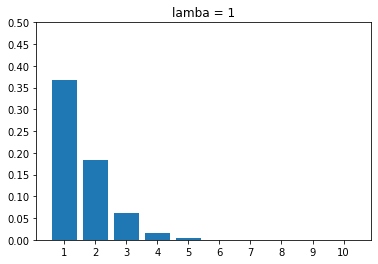

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

pmfs = pmfs_over_n_events(1, 10)

plt.bar(range(1, 11), pmfs, 0.8)
plt.xticks(range(1,11))
plt.yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('lamba = 1')
plt.show()



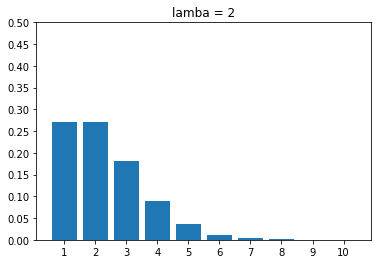

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pmfs = pmfs_over_n_events(2, 10)

plt.bar(range(1, 11), pmfs, 0.8)
plt.xticks(range(1,11))
plt.yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('lamba = 2')
plt.show()


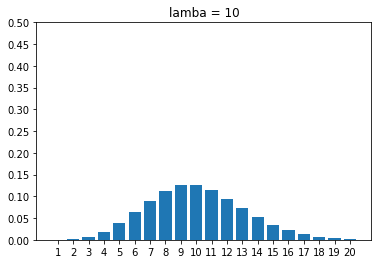

In [5]:
pmfs = pmfs_over_n_events(10, 20)

plt.bar(range(1, 21), pmfs, 0.8)
plt.xticks(range(1,21))
plt.yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('lamba = 10')
plt.show()


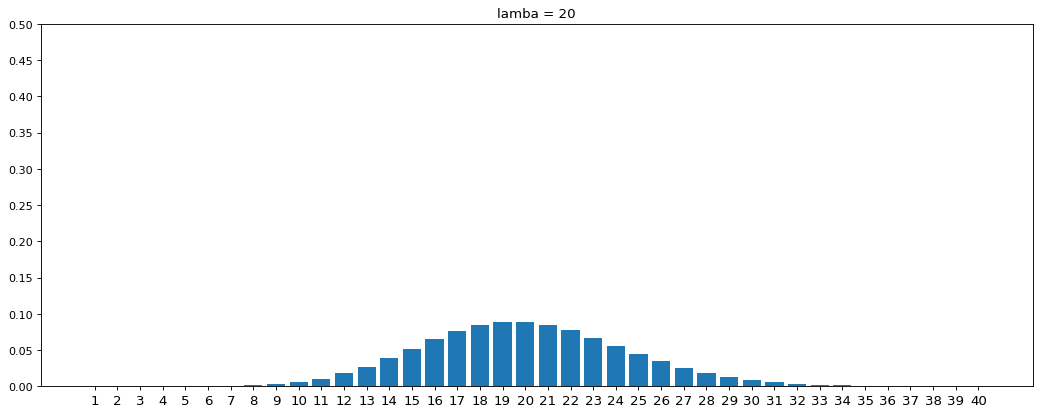

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

pmfs = pmfs_over_n_events(20, 40)

plt.bar(range(1, 41), pmfs, 0.8)
plt.xticks(range(1,41), fontsize=12)
plt.yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.title('lamba = 20')

plt.show()


As you might intuitively expect, the probability is highest at the mean value/lambda of events over a given time.

## Inter-arrival times
* The inter-arrival times between events can be modeled using the Exponential distribution
* In [this blog](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a) we learn to use the inverse CDF function to create inter arrival times.
  * This works because instead giving an interval of time into a cdf function to return the probability, we are going to use the random python library to generate a random probability (0,1) and feed that into the inverse CDF function to get an expected time given the probability.

Inverse-CDF:

$F_X^{-1}(t)=-\frac{ln(1-t)}{\lambda}$ 

where t is some random probability (0,1) and $\lambda$ is the mean number of events given some time interval

In [28]:
import random

def inverse_cdf(t: float, mean_lambda: float) -> float:
  result = -(math.log(1 - t)) / (mean_lambda)
  return result

print(inverse_cdf(random.random(), 10))

0.2756158391367172


In [35]:
def simulate_n_visits(mean_lambda: float, n: int):
  result = []
  arrival_time = 0

  for i in range(n):
    t = random.random()

    inter_arrival_time = inverse_cdf(t, mean_lambda)

    arrival_time = arrival_time + inter_arrival_time
    result.append(arrival_time)
  
  return result

arrival_times = simulate_n_visits(10, 100)


[0.016589944910087164,
 0.38793296748468764,
 0.41481121730360554,
 0.4500114593048906,
 0.5219575698857047,
 0.5394063727534965,
 0.5816484480445411,
 0.6360766749658427,
 0.6603980011308752,
 0.9519320283035664,
 0.9873942260348342,
 1.0892287001417371,
 1.2124770988942075,
 1.359723365894429,
 1.3710911184890813,
 1.4761656002830235,
 1.775891183739363,
 1.8080725787557637,
 1.8150550730463688,
 1.8280739720834753,
 1.9505141564347572,
 2.067733340866693,
 2.071903494337982,
 2.092397509761911,
 2.1196396310263643,
 2.201748607265362,
 2.2586761391342804,
 2.329498695298124,
 2.413808063303998,
 2.5665605747474816,
 2.733650472721418,
 2.734376545559373,
 2.863793926860488,
 2.9547339433764197,
 3.0978213529323932,
 3.1741600599883437,
 3.218468544756606,
 3.2789955937329927,
 3.2977566502089237,
 3.3708331135659546,
 3.3853341444959635,
 3.4791117558505094,
 3.634273235569296,
 3.667191251135479,
 3.703645452160565,
 3.731484741258519,
 3.7612334628302184,
 3.78957873503427,
 3.805

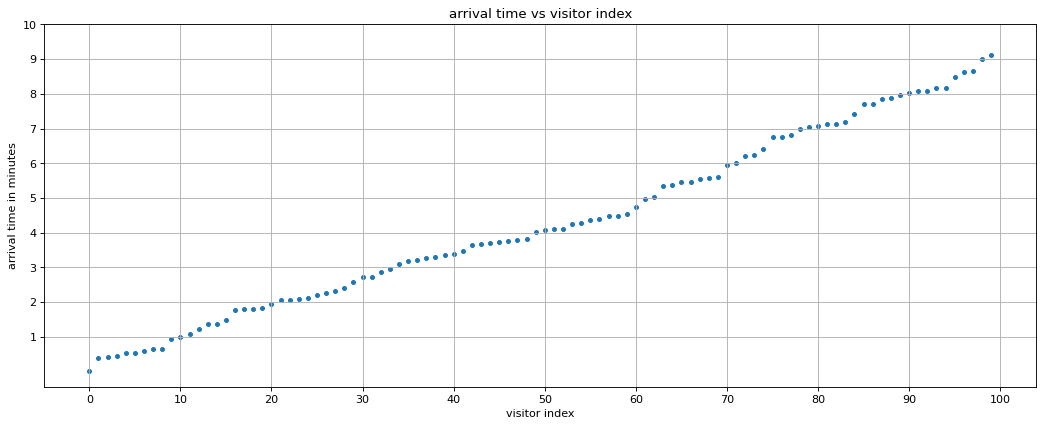

In [52]:
figure(figsize=(16, 6), dpi=80)

plt.scatter(range(100), arrival_times, s=12)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel('arrival time in minutes')
plt.xlabel('visitor index')
plt.title('arrival time vs visitor index')
plt.grid()
plt.show()